# Lecture 05

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# sns.set_style('whitegrid')
sns.set_palette('tab10')

## Tree Model

### Decision Tree basics

In [43]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [44]:
iris_df = iris['frame']
display(iris_df.info(), iris_df.head(120))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


None

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
115,6.4,3.2,5.3,2.3,2
116,6.5,3.0,5.5,1.8,2
117,7.7,3.8,6.7,2.2,2
118,7.7,2.6,6.9,2.3,2


![](https://www.researchgate.net/profile/Wolfgang-Engelmann/publication/265877256/figure/fig3/AS:669555605114885@1536645904238/Flower-of-a-plant-with-peduncle-a-calyx-consisting-of-sepals-petals-stamen-and-in.png)

In [45]:
iris_df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [46]:
target_map = {
    0: 1,
    1: 0,
    2: 0
}

In [47]:
ser = iris_df['target'].map(target_map)
ser

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: target, Length: 150, dtype: int64

In [48]:
target_map2 = {
    0: 0,
    1: 1,
    2: 0
}
ser2 = iris_df['target'].map(target_map2)
ser2

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Name: target, Length: 150, dtype: int64

In [49]:
target_map3 = {
    0: 0,
    1: 0,
    2: 1
}
ser3 = iris_df['target'].map(target_map3)
ser3

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: target, Length: 150, dtype: int64

In [50]:
iris_df['is_type1'] = ser
iris_df['is_type2'] = ser2
iris_df['is_type3'] = ser3
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,is_type1,is_type2,is_type3
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,0,1
146,6.3,2.5,5.0,1.9,2,0,0,1
147,6.5,3.0,5.2,2.0,2,0,0,1
148,6.2,3.4,5.4,2.3,2,0,0,1


In [51]:
iris_df = iris_df.drop('target', axis = 1)
iris_df

TypeError: 'DataFrame' object is not callable

In [61]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),is_type1,is_type2,is_type3
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
training_data = iris_df

In [58]:
train, test = train_test_split(training_data, random_state=1000) # mỗi lần chạy lại là xáo lại dữ liệu và trả random
# tuy nhiên cùng random_state thì kết quả giống nhau
display(
    train,
    test
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),is_type1,is_type2,is_type3
101,5.8,2.7,5.1,1.9,0,0,1
102,7.1,3.0,5.9,2.1,0,0,1
126,6.2,2.8,4.8,1.8,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1
115,6.4,3.2,5.3,2.3,0,0,1
...,...,...,...,...,...,...,...
1,4.9,3.0,1.4,0.2,1,0,0
92,5.8,2.6,4.0,1.2,0,1,0
94,5.6,2.7,4.2,1.3,0,1,0
71,6.1,2.8,4.0,1.3,0,1,0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),is_type1,is_type2,is_type3
95,5.7,3.0,4.2,1.2,0,1,0
34,4.9,3.1,1.5,0.2,1,0,0
127,6.1,3.0,4.9,1.8,0,0,1
120,6.9,3.2,5.7,2.3,0,0,1
24,4.8,3.4,1.9,0.2,1,0,0
28,5.2,3.4,1.4,0.2,1,0,0
84,5.4,3.0,4.5,1.5,0,1,0
68,6.2,2.2,4.5,1.5,0,1,0
38,4.4,3.0,1.3,0.2,1,0,0
123,6.3,2.7,4.9,1.8,0,0,1


In [93]:
X_data = training_data.drop(columns=['is_type1', 'is_type2', 'is_type3'])
Y_data = training_data['is_type3']
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, random_state=420, test_size=0.2)

display(
    x_train, x_test, y_train, y_test
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
93,5.0,2.3,3.3,1.0
123,6.3,2.7,4.9,1.8
124,6.7,3.3,5.7,2.1
49,5.0,3.3,1.4,0.2
17,5.1,3.5,1.4,0.3
...,...,...,...,...
115,6.4,3.2,5.3,2.3
31,5.4,3.4,1.5,0.4
63,6.1,2.9,4.7,1.4
134,6.1,2.6,5.6,1.4


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
66,5.6,3.0,4.5,1.5
104,6.5,3.0,5.8,2.2
105,7.6,3.0,6.6,2.1
2,4.7,3.2,1.3,0.2
7,5.0,3.4,1.5,0.2
67,5.8,2.7,4.1,1.0
27,5.2,3.5,1.5,0.2
90,5.5,2.6,4.4,1.2
138,6.0,3.0,4.8,1.8
91,6.1,3.0,4.6,1.4


93     0
123    1
124    1
49     0
17     0
      ..
115    1
31     0
63     0
134    1
72     0
Name: is_type3, Length: 120, dtype: int64

66     0
104    1
105    1
2      0
7      0
67     0
27     0
90     0
138    1
91     0
139    1
84     0
22     0
25     0
112    1
82     0
42     0
6      0
11     0
46     0
20     0
145    1
89     0
12     0
54     0
56     0
39     0
33     0
81     0
58     0
Name: is_type3, dtype: int64

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
clr = LogisticRegression(
    max_iter=1000 # giá trị mặc định = 100 thì báo warning ko tìm đc đáp án
)

clr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [96]:
pd.Series(clr.coef_[0], index=x_test.columns)

sepal length (cm)   -0.485706
sepal width (cm)    -0.417249
petal length (cm)    2.789318
petal width (cm)     2.157043
dtype: float64

In [97]:
from sklearn import metrics

In [98]:
y_pred = clr.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [99]:
(y_pred == y_test).sum()/len(y_test) # Tỷ lệ accuracy độ chính xác

1.0

In [100]:
metrics.accuracy_score(y_test, y_pred)

1.0

<AxesSubplot:>

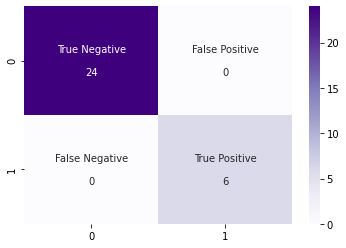

In [101]:
# Confusion Matrix (Ma trận nhầm lẫn)
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels = np.asarray([f'{i}\n\n{j}' for i, j in zip(names, cf_matrix.flatten())])
sns.heatmap(cf_matrix, annot=labels.reshape(2, 2), cmap='Purples', fmt='')

In [102]:
# Ma trận nhầm lẫn có 4 phân loại: 11, 10, 01, 01 (dự đoán - thực tế)
# Tỷ lệ Precision: trong tất cả dự đoán là 1 -> đoán đúng bao nhiêu
metrics.precision_score(y_test, y_pred)


1.0

In [103]:
# Tỷ lệ Recall: trong tất của thực tế là 1 -> đoán ra bao nhiêu
metrics.recall_score(y_test, y_pred)

1.0

In [104]:
# Trung bình điều hòa
metrics.f1_score(y_test, y_pred)

1.0

<AxesSubplot:xlabel='target', ylabel='count'>

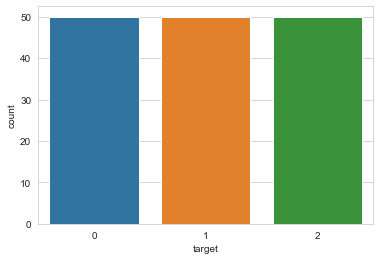

In [38]:
sns.countplot(data=iris_df, x='target', palette='tab10')

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

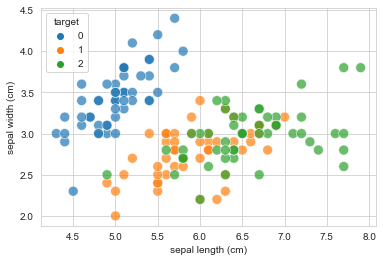

In [42]:
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', s=100, alpha=0.7, palette='tab10')

In [55]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [44]:
X, y = iris_df[['sepal length (cm)', 'sepal width (cm)']], iris_df['target']

In [45]:
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

In [51]:
y_pred = tree.predict(X)
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)

Accuracy score:  92.66666666666666


In [61]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    X, y = X.values, y.values
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), 
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

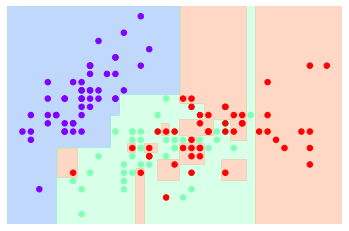

In [62]:
visualize_classifier(tree, X, y)

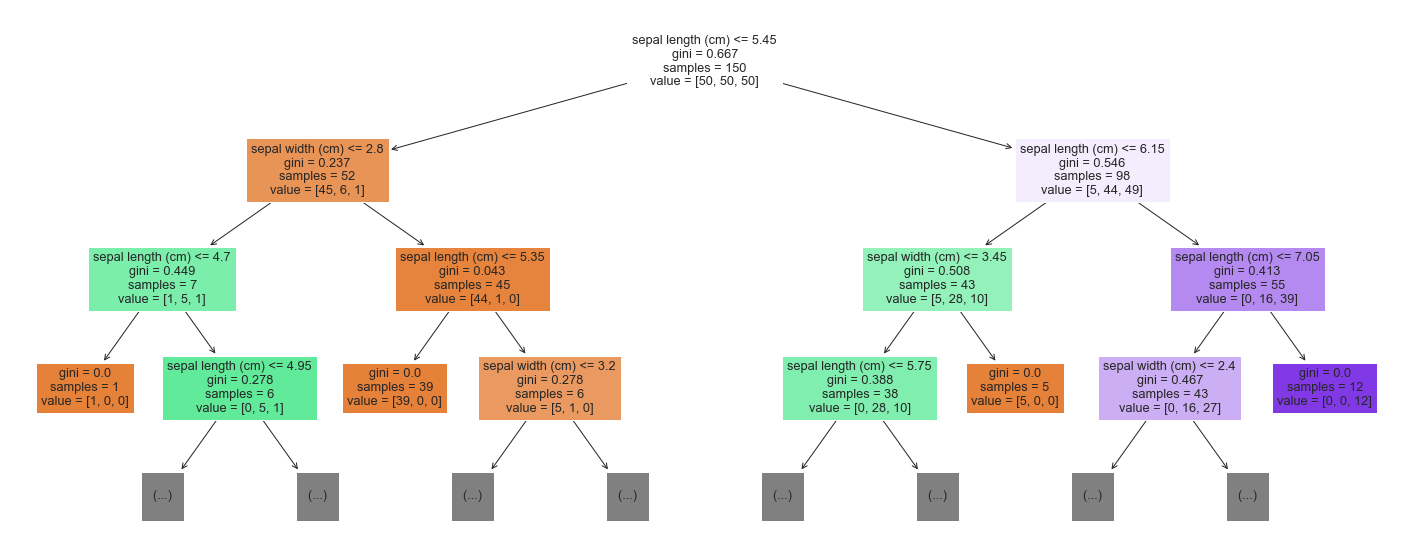

In [72]:
plt.figure(figsize=(25, 10))
_ = plot_tree(tree, feature_names=iris_df.columns, max_depth=3, filled=True)

### Random Forest

![](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
forest = RandomForestClassifier()

forest.fit(X, y)


RandomForestClassifier()

In [80]:
print(len(forest.estimators_))
forest.estimators_[:5]

100


[DecisionTreeClassifier(max_features='auto', random_state=670343684),
 DecisionTreeClassifier(max_features='auto', random_state=1147638816),
 DecisionTreeClassifier(max_features='auto', random_state=716896921),
 DecisionTreeClassifier(max_features='auto', random_state=221800676),
 DecisionTreeClassifier(max_features='auto', random_state=318648955)]

In [77]:
y_pred = forest.predict(X)
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)

Accuracy score:  92.66666666666666


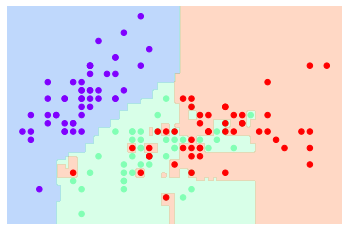

In [75]:
visualize_classifier(forest, X, y)

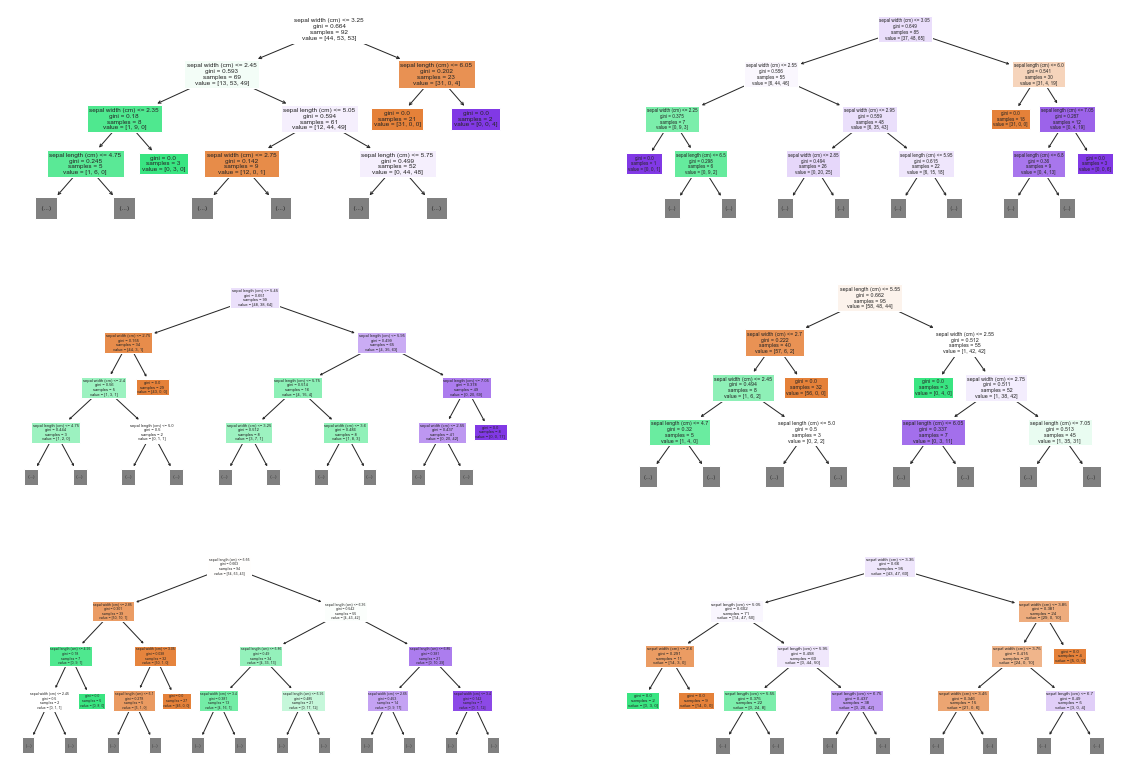

In [82]:
fig, axs = plt.subplots(3, 2, figsize=(20, 14))

for tree, ax in zip(forest.estimators_[:6], axs.ravel()):
    plot_tree(tree, feature_names=iris_df.columns, max_depth=3, filled=True, ax=ax)

## Support Vector Machines

<AxesSubplot:xlabel='target', ylabel='count'>

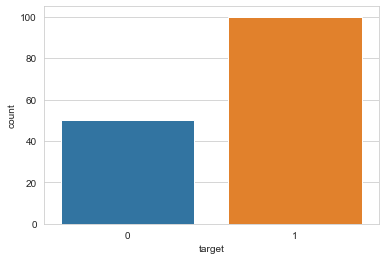

In [86]:
y_binary = y.gt(0).astype(int)
sns.countplot(x=y_binary)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

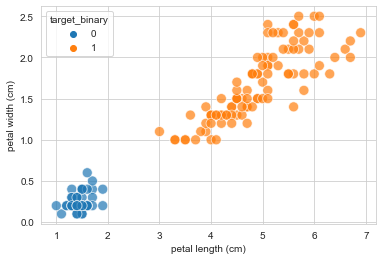

In [106]:
iris_df['target_binary'] = y_binary
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')

In [107]:
X, y = iris_df[['petal length (cm)', 'petal width (cm)']], iris_df['target_binary']

In [129]:
from sklearn.svm import SVC # Support Vector Classifier

svc = SVC(kernel='linear') # C = 1.0
svc.fit(X, y)

SVC(kernel='linear')

In [130]:
y_pred = svc.predict(X)
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)

Accuracy score:  100.0


In [131]:
# Decision Tree va Random Forest cho ket qua bao nhieu?

In [147]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolor='none', edgecolor='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

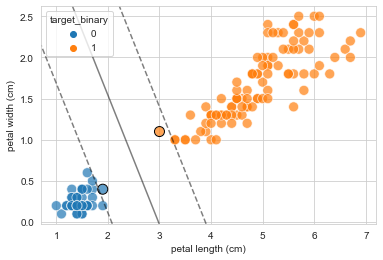

In [148]:
ax = sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

In [138]:
svc.decision_function

<bound method BaseSVC.decision_function of SVC(kernel='linear')>

In [149]:
svc.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

### Beyond linear boundaries: Kernel SVM

<AxesSubplot:xlabel='target_binary', ylabel='count'>

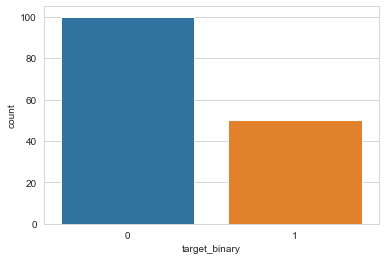

In [183]:
y_binary = y.gt(0).astype(int)
sns.countplot(x=y_binary)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

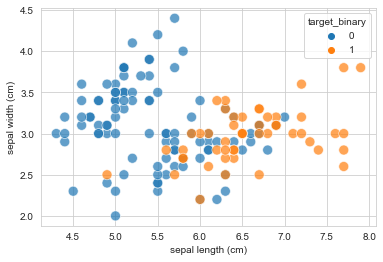

In [184]:
iris_df['target_binary'] = y_binary
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')

In [186]:
X, y = iris_df[['sepal length (cm)', 'sepal width (cm)']], iris_df['target_binary']

In [187]:
svc = SVC(kernel='linear') # C = 1.0
svc.fit(X, y)

SVC(kernel='linear')

In [188]:
y_pred = svc.predict(X)
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)

Accuracy score:  82.0


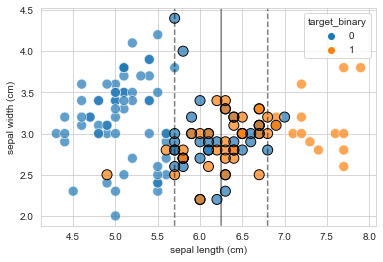

In [190]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

In [223]:
svc = SVC(kernel='rbf') # C = 1.0
svc.fit(X, y)

SVC()

In [224]:
y_pred = svc.predict(X)
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)

Accuracy score:  82.66666666666667


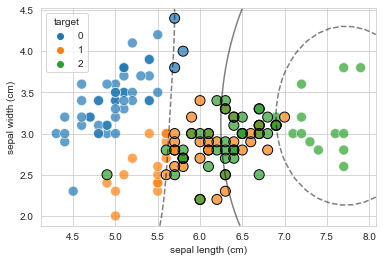

In [225]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

### Tuning the SVM: Softening Margins

In [226]:
svc = SVC(kernel='rbf', C=100) # C = 100.0
svc.fit(X, y)

SVC(C=100)

In [227]:
y_pred = svc.predict(X)
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)

Accuracy score:  83.33333333333334


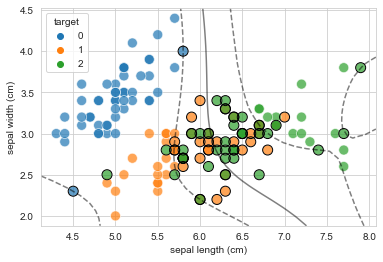

In [229]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

## Regularization Linear Model

## Model Validation & Cross Validation

In [232]:
from sklearn.model_selection import train_test_split, KFold

In [234]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
tree = DecisionTree()